In [5]:
from model import Model
from torch import load
import torch
model = Model()
model.load_pretrained_model('model9.pth')

In [6]:
path_train = '../data/train_data.pkl'
path_val = '../data/val_data.pkl'
# noisy_imgs_1, noisy_imgs_2 = load(path_train)
# noisy_imgs_1 = noisy_imgs_1
# noisy_imgs_2 = noisy_imgs_2
noisy_imgs , clean_imgs = load(path_val)
out = model.predict(noisy_imgs)

In [9]:
def compute_psnr(x, y, max_range=1.0):
    
    assert x.shape == y.shape and x.ndim == 4
    return 20 * torch.log10(torch.tensor(max_range)) - 10 * torch.log10(((x-y) ** 2).mean((1,2,3)))
def compute_psnr_mean(x, y, max_range=1.0):
    print(x.mean(), y.mean())
    assert x.shape == y.shape and x.ndim == 4
    out = 20 * torch.log10(torch.tensor(max_range)) 
    sqr = (x-y) ** 2
    print(sqr.mean())
    out2 = - 10 * torch.log10((sqr).mean((1,2,3))).mean()
    print(out, out2)
    return out + out2
psnr = compute_psnr(noisy_imgs.float()/255, out.cpu().float()/255)
psnr_comp = compute_psnr(noisy_imgs.float()/255, clean_imgs.float()/255)
# print(psnr)$
print(compute_psnr_mean(noisy_imgs.float()/255.0, out.cpu().float()/255.0))
print(compute_psnr_mean(noisy_imgs.float()/255.0, clean_imgs.float()/255.0))


tensor(0.4384) tensor(0.4352)
tensor(0.0077)
tensor(0.) tensor(22.1999)
tensor(22.1999)
tensor(0.4384) tensor(0.4384)
tensor(0.0109)
tensor(0.) tensor(20.7239)
tensor(20.7239)


(-0.5, 31.5, 31.5, -0.5)

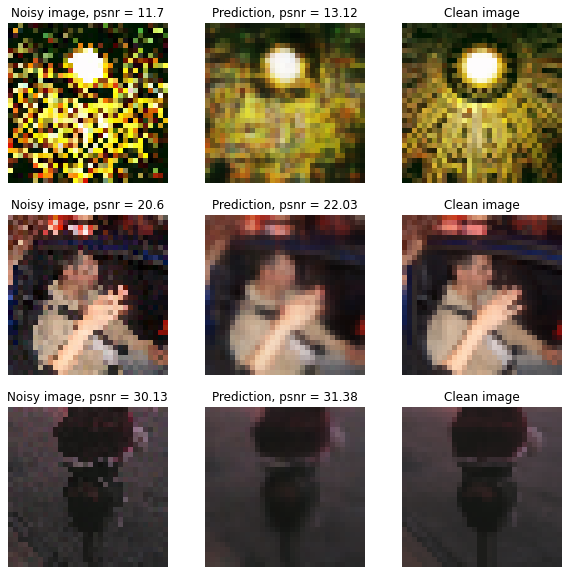

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as T 
from PIL import Image
transform = T.ToPILImage()
k = 908
plt.figure(figsize = [10, 10])
plt.subplot(3, 3,1)
plt.imshow(transform(noisy_imgs[k]));
plt.title('Noisy image, psnr = '+ str(round(psnr_comp[k].item(), 2)))
plt.axis('off')
plt.subplot(3, 3,2)
plt.title('Prediction, psnr = ' + str(round(psnr[k].item(), 2)))
plt.imshow(transform(out[k]));
plt.axis('off')
plt.subplot(3, 3,3)
plt.title('Clean image')
plt.imshow(transform(clean_imgs[k]));
plt.axis('off')

k = 910
# plt.figure(figsize = [10, 5])
plt.subplot(3, 3,4)
plt.title('Noisy image, psnr = '+ str(round(psnr_comp[k].item(), 2)))
plt.imshow(transform(noisy_imgs[k]));
plt.axis('off')
plt.subplot(3, 3,5)
plt.title('Prediction, psnr = ' + str(round(psnr[k].item(), 2)))
plt.imshow(transform(out[k]));
plt.axis('off')
plt.subplot(3, 3,6)
plt.title('Clean image')
plt.imshow(transform(clean_imgs[k]));
plt.axis('off')
k=105
# k= 978
# plt.figure(figsize = [10, 5])
plt.subplot(3, 3,7)
plt.title('Noisy image, psnr = '+ str(round(psnr_comp[k].item(), 2)))
plt.imshow(transform(noisy_imgs[k]));
plt.axis('off')
plt.subplot(3, 3,8)
plt.title('Prediction, psnr = ' + str(round(psnr[k].item(), 2)))
plt.imshow(transform(out[k]));
plt.axis('off')
plt.subplot(3, 3,9)
plt.title('Clean image')
plt.imshow(transform(clean_imgs[k]));
plt.axis('off')

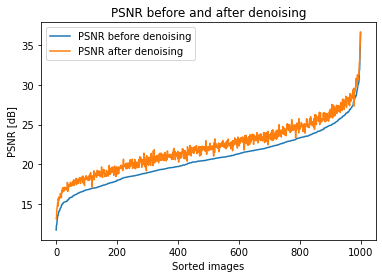

In [11]:
# print(torch.argsort(psnr))
asort = torch.argsort(psnr_comp)
plt.plot(psnr_comp[asort], label = 'PSNR before denoising')
plt.plot(psnr[asort], label = 'PSNR after denoising')
plt.title('PSNR before and after denoising')
plt.xlabel('Sorted images')
plt.ylabel('PSNR [dB]')
plt.legend()
